# Color bimodality in the galaxy population

Galaxies were first categorized according to morphology by Hubble in his paper from 1926. Later, it has been established that there are several other variables which correlate with this initial categorization into spiral (late type) and elliptical (early type) galaxies. One of them is the color of the galaxy. Colors are measured as the difference in magnitude for different optical filters, corresponding to dividing the luminosity of one passband by another. 
$$ \Delta m_{g-r} = m_g - m_r $$

It has been found that early type galaxies are more likely to be redder in color, while late type galaxies are more blue. There are many reasons why this is the case, as there are many variables which affect the color of a galaxy. Some are: stellar age, stellar metallicity, the amount of dust, the amount of gas, the metallicity of the gas and star formation.

In [9]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

late_type = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl")
early_type = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_earlyType_Gas.pkl")
data = pd.read_pickle("../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM.pkl")
sami = pd.read_csv("../data/SAMI/all_data_vrot.csv")
sami_early = pd.read_csv("../data/SAMI/earlies_vrot.csv")
sami_late = pd.read_csv("../data/SAMI/lates_vrot.csv")

sami["mstar_log"] = np.log10(sami["mstar"])
sami_early["mstar_log"] = np.log10(sami_early["mstar"])
sami_late["mstar_log"] = np.log10(sami_late["mstar"])


In the IllustrsTNG data, the information about the different passband magnitudes are found in the tag "SubhaloStellarPhotometrics". This contains the magnitudes for 8 different passbands. The colors must be calculated manually by comparing the desired filters. The early and late type galaxies are plotted seperately, as well as the entire population, to be able to compare the two types.

In [10]:
def magnitudes(n, name, df):
    key = name + "-band"
    temp = np.array(list(df["SubhaloStellarPhotometrics"]))
    df[key] = temp[:,n]
    return df

def colors(c1, c2, df):
    key = c1+"-"+c2
    a,b  = c1 + "-band", c2 + "-band"
    df[key] = df[a]-df[b]
    return df
    
def c_mg(df1, df2, bands, axis, y0, y1):
    df1["SubhaloMassStellar_log"] = np.log10(list(df1["SubhaloMassStellar"]))
    df2["SubhaloMassStellar_log"] = np.log10(list(df2["SubhaloMassStellar"]))
    df1.plot.scatter(x="SubhaloMassStellar_log", y=bands, ax=axis, color="#e31a1c", alpha=0.3, s=20, label="TNG early type")
    df2.plot.scatter(x="SubhaloMassStellar_log", y=bands, ax=axis, color="#1f78b4", alpha=0.3, s=20, label="TNG late type")
    il.formatplot.C_SM(color=bands, ax=axis, y0=y0, y1=y1)

def pdf(df1, df2, df3, bands, axis, legend_on=False):
    ser1, ser2, ser3 = df1[bands], df2[bands], df3[bands]
    ser1.plot.kde(ax=axis, color="black", linewidth=2, label="All centrals")
    ser2.plot.kde(ax=axis, color="#e31a1c", linewidth=2, label="Early type")
    ser3.plot.kde(ax=axis, color="#1f78b4", linewidth=2, label="Late type")
    il.formatplot.PDF_C(color = bands, ax = axis, legend_on=legend_on)

bands = ["U", "B", "V", "K", "g","r","i","z"]
dataframes = [data, late_type, early_type]

for n in range (len(bands)):
    #Separating out filters into their own columns for plotting
    for dataframe in dataframes:
        dataframe = magnitudes(n, bands[n], dataframe)
for dataframe in dataframes:  
    #Calculating the filter difference/color. Bluer - redder.  
    dataframe = colors("g", "r", dataframe)
    dataframe = colors("r", "i", dataframe)
    dataframe = colors("U", "r", dataframe)
    dataframe = colors("g", "i", dataframe)

The color-magnitude diagrams of the galaxy population show the relation between galaxy color and galaxy luminosity (or stellar mass). There is a clear distinction between blue late-type galaxies and redder (and larger) early-types ([GFE](textbook)). This is seen also for the TNG data for different passband differences.

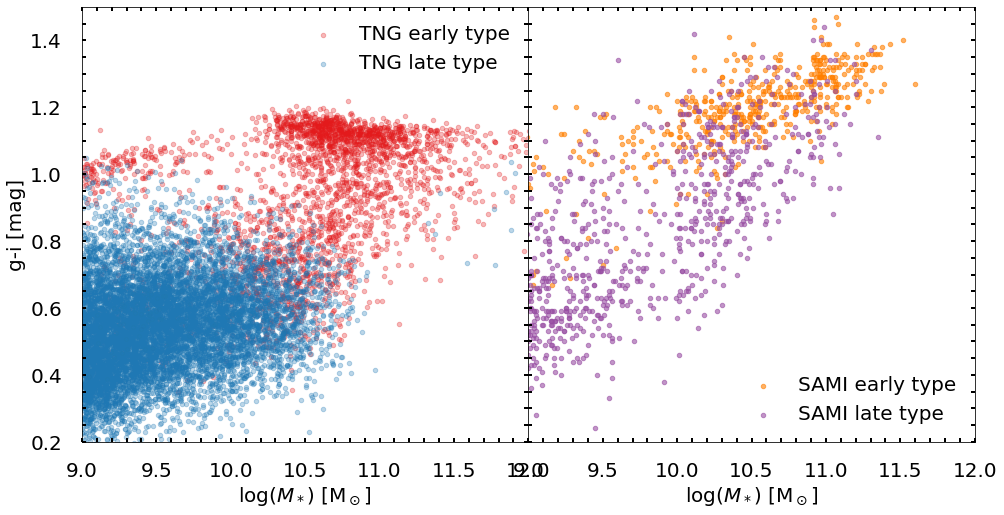

In [11]:

fig1, axs1 = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), sharey=True, sharex=True, squeeze=True)
c_mg(df1=early_type, df2=late_type, bands="g-i", axis=axs1[0], y0=(0.2), y1=1.5)
#sami_early.plot.scatter(x="mstar_log", y="g_i", color='#4daf4a', s=10, alpha=0.3, ax=axs1[1], label ="SAMI all galaxies")
sami_early.plot.scatter(x="mstar_log", y="g_i", color='#ff7f00', s=20, alpha=0.6, ax=axs1[1], label ="SAMI early type")
sami_late.plot.scatter(x="mstar_log", y="g_i", color='#984ea3', s=20, alpha=0.6, ax=axs1[1], label ="SAMI late type")
il.formatplot.C_SM(color="g-i", ax=axs1[1], y0=0.2, y1=1.5)
fig1.subplots_adjust(hspace=0, wspace=0)
plt.savefig("../fig/results_color_magnitude.png")

Another interesting figure to look at alongside the color-magnitude diagram, is the probability density function (PDF) of the population. This hsows the spread in colors, and has two distinct peaks if we look at the PDF for all the galaxies. This is the blue and red population of galaxies, which coincide well with the late-type/early-type classification employed in this project.

OBS: Not normalized between data sets.

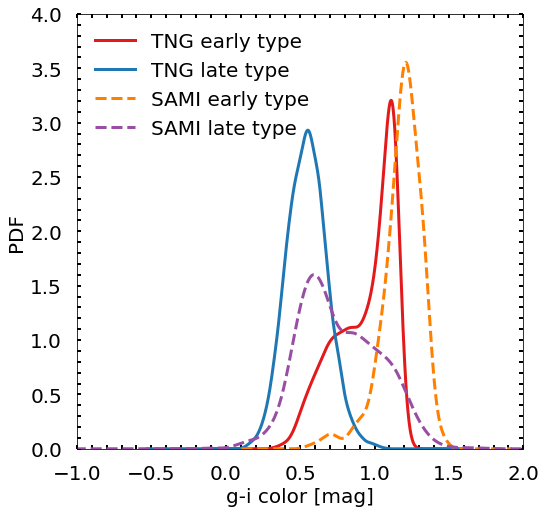

In [12]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
ser1, ser2, ser3, ser4 = early_type["g-i"], late_type["g-i"], sami_early["g_i"], sami_late["g_i"]
ser1.plot.kde(ax=ax3, color = '#e31a1c', linewidth=3, label="TNG early type")
ser2.plot.kde(ax=ax3, color = '#1f78b4', linewidth=3, label="TNG late type")
ser3.plot.kde(ax=ax3, label="SAMI early type", color = '#ff7f00', linewidth=3, linestyle="--")
ser4.plot.kde(ax=ax3, label="SAMI late type", color = '#984ea3', linewidth=3, linestyle="--")
il.formatplot.PDF_C('g-i', ax3, legend_on=True)
plt.savefig("../fig/results_pdf_g_i_band.png", dpi=300)

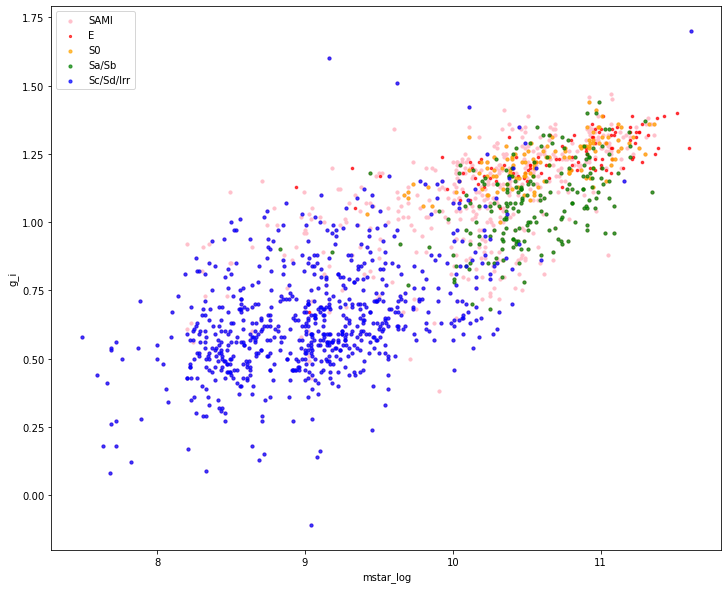

In [13]:
fig1_1, axs1_1 = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10))
morph_key = "morph"
elliptical = sami[sami[morph_key] == 0]
s0 = sami[sami[morph_key] == 1]
sa_sb = sami[sami[morph_key] == 2]
sc_sd_irr = sami[sami[morph_key] == 3]
sami.plot.scatter(x="mstar_log", y="g_i", color='pink', s=10, alpha=1, ax=axs1_1, label ="SAMI")
elliptical.plot.scatter(x="mstar_log", y="g_i", color='red', s=5, alpha=0.7, ax=axs1_1, label ="E")
s0.plot.scatter(x="mstar_log", y="g_i", color='orange', s=10, alpha=0.7, ax=axs1_1, label ="S0")
sa_sb.plot.scatter(x="mstar_log", y="g_i", color='green', s=10, alpha=0.7, ax=axs1_1, label ="Sa/Sb")
sc_sd_irr.plot.scatter(x="mstar_log", y="g_i", color='blue', s=10, alpha=0.7, ax=axs1_1, label ="Sc/Sd/Irr")
plt.legend()

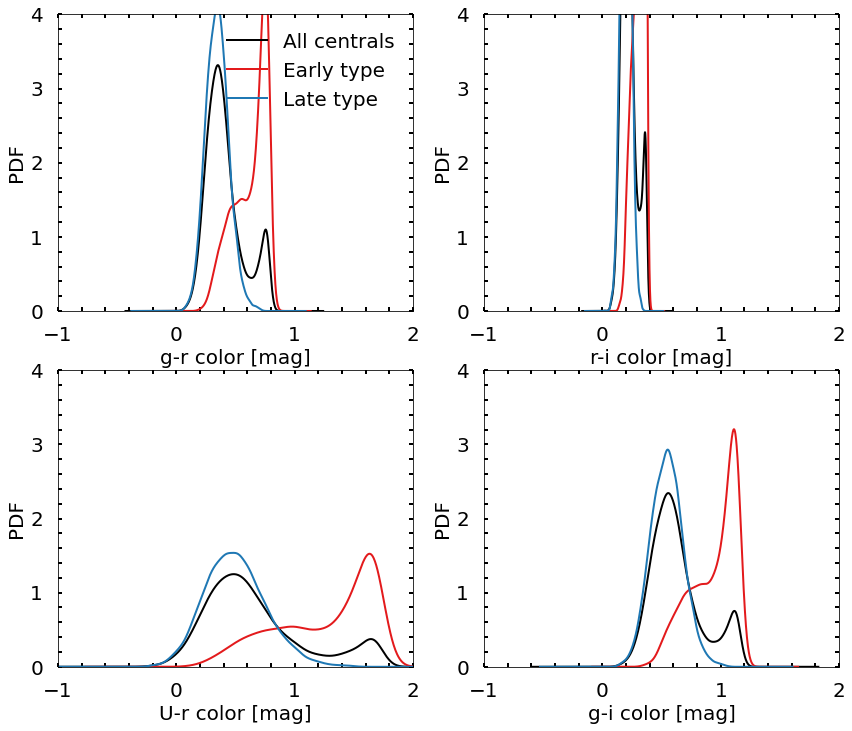

In [14]:
fig2, axs2 = plt.subplots(nrows = 2, ncols = 2, figsize = (14,12))

pdf(df1=data, df2=early_type, df3=late_type, bands="g-r", axis=axs2[0][0], legend_on=True)
pdf(df1=data, df2=early_type, df3=late_type, bands="r-i", axis=axs2[0][1])
pdf(df1=data, df2=early_type, df3=late_type, bands="U-r", axis=axs2[1][0])
pdf(df1=data, df2=early_type, df3=late_type, bands="g-i", axis=axs2[1][1])
plt.savefig("../fig/results_pdf_different_bands.png")

Comparing data to the SAMI survey.

In [15]:
print(len(sami["g_i"]))
print(len(sami_early["g_i"]))
print(len(sami_late["g_i"]))

1642
517
1033
